# Instruction
All python libraries used are listed in the first code cell of each Exercise's Jupyter part.

# Exercise1

In [1]:
import requests
import numpy as np
np.random.seed(4)

1. Implement a two-dimensional version of the gradient descent algorithm to find optimal choices of a and b. (7 points)

In [2]:
h=1e-4
gamma=0.1
maxstep=1000
epsilon=1e-8
f=lambda x,y:float(requests.get(f"http://ramcdougal.com/cgi-bin/error_function.py?a={x}&b={y}", headers={"User-Agent": "MyScript"}).text)
gradient = lambda x,y:[(f(x+h,y)-f(x,y))/h,(f(x,y+h)-f(x,y))/h]
final_state=[]
for a,b in [(np.random.uniform(low=1e-10,high=1.0),np.random.uniform(low=1e-10,high=1.0)) for times in range(10)]:
    print(f'initial state: a={a},b={b}')
    for i in range(maxstep):
        a_old=a
        b_old=b
        a,b = a - gamma * gradient(a,b)[0], b - gamma * gradient(a,b)[1]
        if abs(a-a_old)<epsilon and abs(b-b_old)<epsilon:
            print(f'final state: a={a},b={b}')
            final_state.append((a,b))
            print('early stop: parameter values don\'t change much')
            break
        if i==maxstep-1:
            print('converge failed, reached maximum step')
print('final pairs of minimum parameters:\n',final_state)

initial state: a=0.9670298390169737,b=0.5472322492209991
final state: a=0.7119499990173569,b=0.168949999221637
early stop: parameter values don't change much
initial state: a=0.9726843599676159,b=0.7148159937028831
final state: a=0.2159500399670532,b=0.6889499937025645
early stop: parameter values don't change much
initial state: a=0.697728824627498,b=0.21608949565876742
final state: a=0.7119499946277705,b=0.16895000565886406
early stop: parameter values don't change much
initial state: a=0.9762744547786143,b=0.006230255303966837
final state: a=0.7119500047788166,b=0.1689500053037847
early stop: parameter values don't change much
initial state: a=0.2529823624581457,b=0.43479153246096663
final state: a=0.215950002458068,b=0.6889499624607289
early stop: parameter values don't change much
initial state: a=0.7793829218158141,b=0.19768507468048457
final state: a=0.7119500018161482,b=0.16895000468103194
early stop: parameter values don't change much
initial state: a=0.862993235612923,b=0.983

2. Explain how you estimate the gradient given that you cannot directly compute the derivative (3 points)

Since we already have the API {http://ramcdougal.com/cgi-bin/error_function.py?a=0.4&b=0.2}, we can regard it as an implicit function $f(x,y)$ that returns the function's value.

According to gradient's definition: $\nabla f=(\frac{\partial f}{\partial x},\frac{\partial f}{\partial y})$

We can calculate partial derivatives at the given point $(x=a,y=b)$ separately:
$\frac{\partial f}{\partial x}=\lim_{h\to0}\frac{f(a+h,b)-f(a,b)}{h}$

$\frac{\partial f}{\partial y}=\lim_{h\to0}\frac{f(a,b+h)-f(a,b)}{h}$

By setting $h$ to a very small value, we can estimate partial derivatives' values, and they constitute our gradient vector.

3. identify any numerical choices -- including but not limited to stopping criteria -- you made (3 points), and justify why you think they were reasonable choices (3 points).

I set $h=1e-4$ to make h is small enough to give precise gradient estimation. I didn't set h to be extremely small value to avoid float precision overflow.

$gamma=0.1$ is to make each updating step not too large or too small. Therefore, the convergence will go smoothly.

Stopping criteria $max step=1000$ is set to detect non-convergence.
$epsilon=1e-8$ is set to compare former parameters' values with current parameters' values. If their differences are smaller than 1e-8, we can assume they reach convergence.

Initial state of $a,b$ are both set as random floats ranging in (0,1) by np.random.uniform(low=1e-10,high=1.0), excluding 0 and 1 to avoid 'Bad Input' error.

$a,b$ are initialized differently 10 times to find different minimal points to escape local minimum.

4. It so happens that this error function has a local minimum and a global minimum. Find both locations (i.e. a, b values) querying the API as needed (5 points) and identify which corresponds to which (2 point).

In the above code cell, we have already got a list *final_state* containing 10 pairs of minimum points $(a,b)$ by initializing $(a,b)$ differently 10 times. So we just need to identify which corresponds to which. Set the floating point precision to 5 decimal places, we find the global minimum location is (0.71195, 0.16895) and the local minimum location is (0.21595, 0.68895). Global minimum value is 1.000000015 and local minimum value is 1.100000005.

In [4]:
final_state_value=[f(a,b)  for a,b in final_state]
print(final_state_value)
global_index=np.argmin(final_state_value)
local_index=np.argmax(final_state_value)
print('global minimum (a,b) is',np.around(final_state[global_index],5))
print('global minimum value is',np.min(final_state_value))
print('local minimum (a,b) is',np.around(final_state[local_index],5))
print('local minimum value is',np.max(final_state_value))

[1.000000015, 1.100000005, 1.000000015, 1.000000015, 1.100000005, 1.000000015, 1.100000005, 1.100000005, 1.100000005, 1.100000005]
global minimum (a,b) is [0.71195 0.16895]
global minimum value is 1.000000015
local minimum (a,b) is [0.21595 0.68895]
local minimum value is 1.100000005


5. Briefly discuss how you would have tested for local vs global minima if you had not known how many minima there were. (2 points)

I will initialize $a,b$ randomly for more times like 50 times or more to get different convergence minimum points, calculate each point's function value and store them in a list named *minima_values*.

For global minima, I will use np.argmin(*minima_values*) to find the global minimum's location index as I did in the above code cell.

np.min(*minima_values*) is the global minimum value. Then other values are all local minima.

# Exercise 2

In [3]:
import pandas as pd
import numpy as np
import random
import numpy.linalg as lin
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from math import atan2, acos, degrees, pi
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

1. Modify the k-means code (or write your own) from slides8 to use the Haversine metric and work with our dataset (5 points). Note: since this algorithm uses (pseudo)randomness, you'll have to run it multiple times to get a sense of expected runtime.

In [4]:
df=pd.read_csv('worldcities.csv')
def normalize(series):
    return (series-series.mean())/series.std()

df['lng_nor']=normalize(df['lng'])
df['lat_nor']=normalize(df['lat'])

In [11]:
def kmeans(df,k):
    pts = [np.array(pt) for pt in zip(df['lng'], df['lat'])]
    # pts = [np.array(pt) for pt in zip(df['lng_nor'], df['lat_nor'])]
    centers = random.sample(pts, k)
    old_cluster_ids, cluster_ids = None, []
    count=0 # To avoid stuck in a cycle
    while cluster_ids != old_cluster_ids and count<100:
        count+=1
        if count==100: # Reach 100 iterations, break
            print('Stuck in a cycle, break')
        old_cluster_ids = list(cluster_ids)
        cluster_ids = []
        for pt in pts:
            min_cluster = - 1
            min_dist = float('inf')
            for i, center in enumerate(centers):
                # Calculate distance using haversine
                dist = haversine(pt[0], pt[1], center[0], center[1])
                if dist < min_dist:
                    min_cluster = i
                    min_dist = dist
            cluster_ids.append(min_cluster)
        df['cluster'] = cluster_ids
        cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
                       for match in range(k)]
        # Use the simple center calculation first
        centers = [sum(pts)/len(pts) for pts in cluster_pts]
        # centers = [centroid(pts) for pts in cluster_pts]

    return df['cluster']

2. Visualize your results with a color-coded scatter plot (5 points); be sure to use an appropriate map projection (i.e. do not simply make x=longitude and y=latitude; 5 points).Use this algorithm to cluster the cities data for k=5, 7, and 15. Run it several times to get a sense of the variation of clusters for each k (share your plots) (5 points);

Stuck in a cycle, break


D:\Chrome_Dwnld\anaconda\envs\IML_env\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\Chrome_Dwnld\anaconda\envs\IML_env\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\Chrome_Dwnld\anaconda\envs\IML_env\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


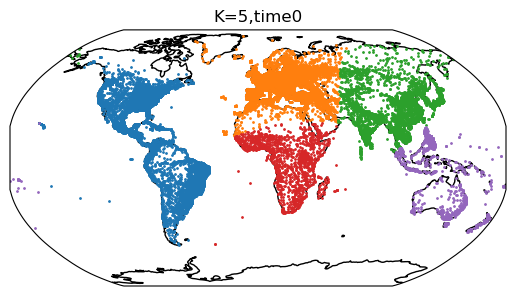

Stuck in a cycle, break


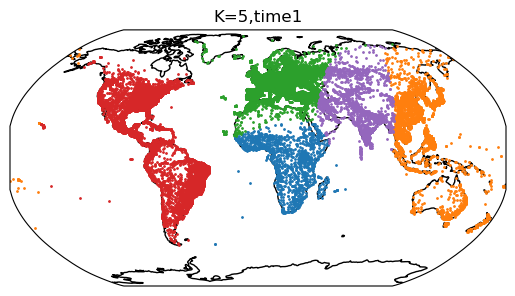

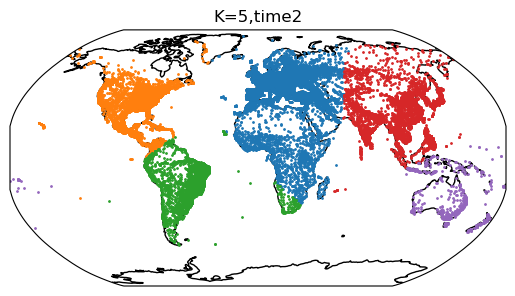

In [12]:
'''Try cluster k=5 for 3 times, they are scattered and projected properly'''
for try_times in range(3):
    clus=kmeans(df,5)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    lats=df['lat']
    lngs=df['lng']
    ax.coastlines()
    for c in np.unique(clus):
        i=np.where(np.array(clus)==c)
        ax.scatter(np.array(lngs)[i],np.array(lats)[i],s=1,label=c,transform=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    plt.title('K=5,time'+str(try_times))
    plt.show()

D:\Chrome_Dwnld\anaconda\envs\IML_env\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\Chrome_Dwnld\anaconda\envs\IML_env\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\Chrome_Dwnld\anaconda\envs\IML_env\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


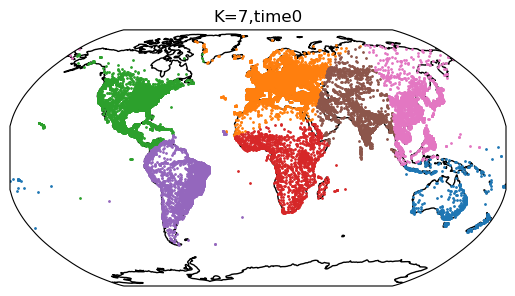

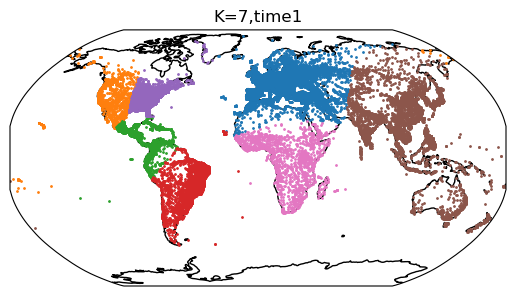

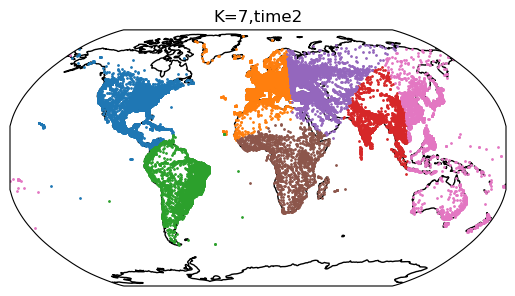

In [13]:
'''Try cluster k=7 for 3 times'''
for try_times in range(3):
    clus=kmeans(df,7)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    lats=df['lat']
    lngs=df['lng']
    ax.coastlines()
    for c in np.unique(clus):
        i=np.where(np.array(clus)==c)
        ax.scatter(np.array(lngs)[i],np.array(lats)[i],s=1,label=c,transform=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    plt.title('K=7,time'+str(try_times))
    plt.show()

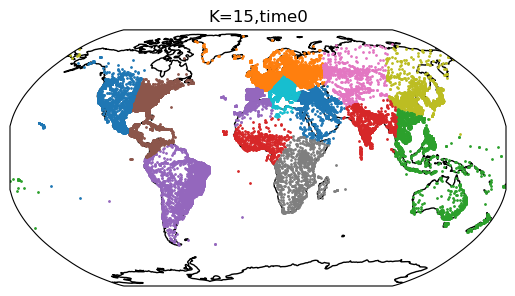

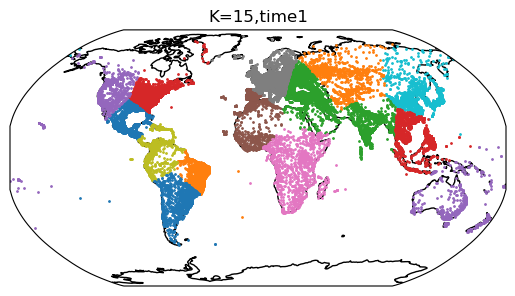

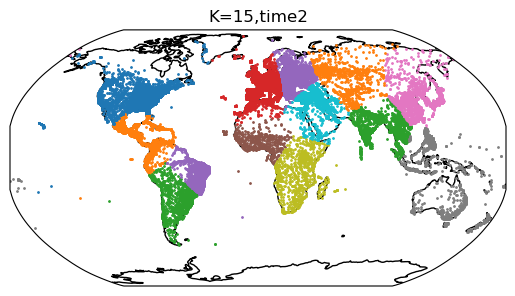

In [14]:
'''Try cluster k=15 for 3 times'''
for try_times in range(3):
    clus=kmeans(df,15)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    lats=df['lat']
    lngs=df['lng']
    ax.coastlines()
    for c in np.unique(clus):
        i=np.where(np.array(clus)==c)
        ax.scatter(np.array(lngs)[i],np.array(lats)[i],s=1,label=c,transform=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    plt.title('K=15,time'+str(try_times))
    plt.show()

3. comment briefly on the diversity of results for each k. (5 points)

As k-means is based on random initialization and is unsupervised clustering method, there are several possible cluster results given a specific $k$. Here, k-means is run 3 times for each $k$ to generate diverse clusters.

For $k=5$, in time 0 and time 1, America, Europe and Africa are 3 clusters; in time 2, America is separated to North America and South America 2 clusters, making most part of Africa in the same cluster with Europe. Also, in time 0 and 2, Asia and Oceania are 2 clusters; but in time 1, East Asia is considered to be in the same cluster with Oceania, West Asia is another cluster.

For $k=7$, in time 0, there are North America, South America, Europe, Africa, South Asia, East Asia, Oceania, 7 clusters. But in time 1, Asia and Oceania are in the same cluster, while America is divided into 4 clusters, North East, North West, Middle and South America. In time 2, East Europe is considered to be 1 cluster and East Asia is in the same cluster with Oceania.

For $k=15$, there are much more cluster variations. America can be separated to 6 clusters in time 1. Asia is separated into 4 clusters all the 3 times. Europe and Africa are separated to 4~6 clusters, while Oceania is always in the same cluster.

##### for 5 extra credit points on the assignment, fix the centroid calculation from the cheatsheet and provide a brief explanation of why it was wrong

I only changed below expressions in inverse_T(vec):
1. theta = atan2(x,y) $\to$ theta = atan2(y,x)
2. phi = acos(z/sqrt(x * x + y * y + z * z)) $\to$ phi = acos(z)
3. long = degrees(theta) $\to$ lat = degrees(theta)4
4. lat = degrees(pi/2-phi) $\to$ long = degrees(pi/2-phi)

and
vT = np.vectorize(T,) $\to$ vT=lambda vec:np.array([T(v) for v in vec ])

The new k-means function using *centroid()* for center calculation is run and tested below.

In [6]:
# Calculate new centers of each cluster
#takes 2-d coords as numpy array, returns numpy array representing vector
def T(geocoords):
    #unpack coords from input
    long, lat = geocoords

    #convert long and lat to spherical coords
    theta = radians(long)
    phi = pi/2 - radians(lat)

    #convert spherical coords to 3-d cartesian coords
    x = sin(phi)*cos(theta)
    y = sin(phi)*sin(theta)
    z = cos(phi)

    return np.array([x,y,z])

# vT = np.vectorize(T,)
vT=lambda vec:np.array([T(v) for v in vec ])
# takes 3 x 1 numpy array representing unit vector,
# returns numpy array representing long and lat coords
def inverse_T(vec):
    #unpack coords of input
    x, y, z = vec

    theta = atan2(y,x)
    # phi = acos(z/sqrt(x * x + y * y + z * z))
    phi = acos(z)

    lat = degrees(theta)
    long = degrees(pi/2 - phi)

    return np.array([long, lat])

# vectorization of inverse T, takes a 3 x n numpy aray representing a list of n unit vectors
# returns 2 x n numpy array representing list of n geocoord pairs
vinverse_T = np.vectorize(inverse_T)
# takes a 3 x n numpy array representing a list of our 3d vectors,
# returns their normalized sum
def cartesian_centroid(vecs):
    summed = np.sum(vecs, axis=0)
    normalized = summed / lin.norm(summed)
    return normalized
# takes a 2 x n numpy array representing a list of our 2d geographical coordinate pairs, returns their centroid as a 2 x 1 numpy array.
def centroid(vecs):
    cart_vecs = vT(vecs)
    cart_center = cartesian_centroid(cart_vecs)
    return inverse_T(cart_center)

In [13]:
def kmeans(df,k):
    pts = [np.array(pt) for pt in zip(df['lng'], df['lat'])]
    # pts = [np.array(pt) for pt in zip(df['lng_nor'], df['lat_nor'])]
    centers = random.sample(pts, k)
    old_cluster_ids, cluster_ids = None, []
    count=0 # To avoid stuck in a cycle
    while cluster_ids != old_cluster_ids and count<200:
        count+=1
        if count==200: # Reach 100 iterations, break
            print('Stuck in a cycle, break')
        old_cluster_ids = list(cluster_ids)
        cluster_ids = []
        for pt in pts:
            min_cluster = - 1
            min_dist = float('inf')
            for i, center in enumerate(centers):
                # Calculate distance using haversine
                dist = haversine(pt[0], pt[1], center[0], center[1])
                if dist < min_dist:
                    min_cluster = i
                    min_dist = dist
            cluster_ids.append(min_cluster)
        df['cluster'] = cluster_ids
        cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
                       for match in range(k)]
        # Use the new center calculation function
        centers = [centroid(pts) for pts in cluster_pts]

    return df['cluster']

Stuck in a cycle, break


D:\Chrome_Dwnld\anaconda\envs\IML_env\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\Chrome_Dwnld\anaconda\envs\IML_env\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\Chrome_Dwnld\anaconda\envs\IML_env\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


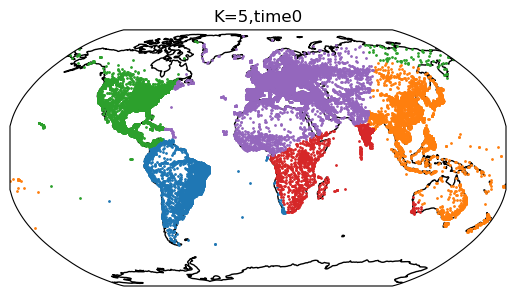

Stuck in a cycle, break


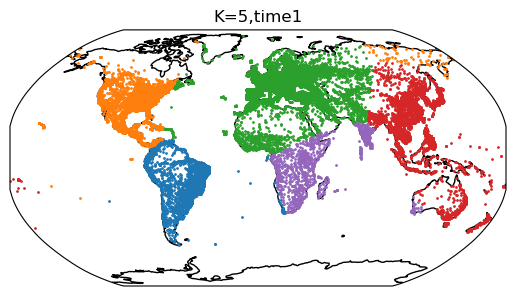

Stuck in a cycle, break


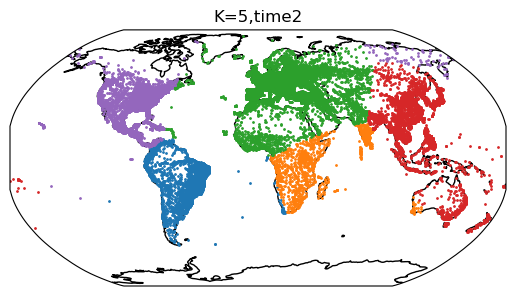

In [14]:
'''Try cluster k=5 for 3 times'''
for try_times in range(3):
    clus=kmeans(df,5)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    lats=df['lat']
    lngs=df['lng']
    ax.coastlines()
    for c in np.unique(clus):
        i=np.where(np.array(clus)==c)
        ax.scatter(np.array(lngs)[i],np.array(lats)[i],s=1,label=c,transform=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    plt.title('K=5,time'+str(try_times))
    plt.show()

# Exercise 3

In class, we discussed two different strategies for computing the Fibonacci sequence: directly with the recursive strategy, and recursive but modified using lru_cache. Implement both (5 points), time them as functions of n (5 points), and display this in the way you think is best (5 points).

In [1]:
from functools import lru_cache
import time
import matplotlib.pyplot as plt

In [5]:
def fibonacci(n):
    if n<=0:
        print('BAD INPUT, n must be positive integer')
        return None
    if n<3:
        return 1
    else:
        return fibonacci(n-1)+fibonacci(n-2)

In [43]:
@lru_cache()
def fibonacci_lru(n):
    if n<=0:
        print('BAD INPUT, n must be positive integer')
        return None
    if n<3:
        return 1
    else:
        return fibonacci_lru(n-1)+fibonacci_lru(n-2)

In [2]:
#time them as functions of n, here *args take the value of n
def time_func(function, *args):
    start=time.time()
    function(*args)
    return time.time()-start

In [34]:
ns=range(1,40)
times=[time_func(fibonacci,n) for n in ns]

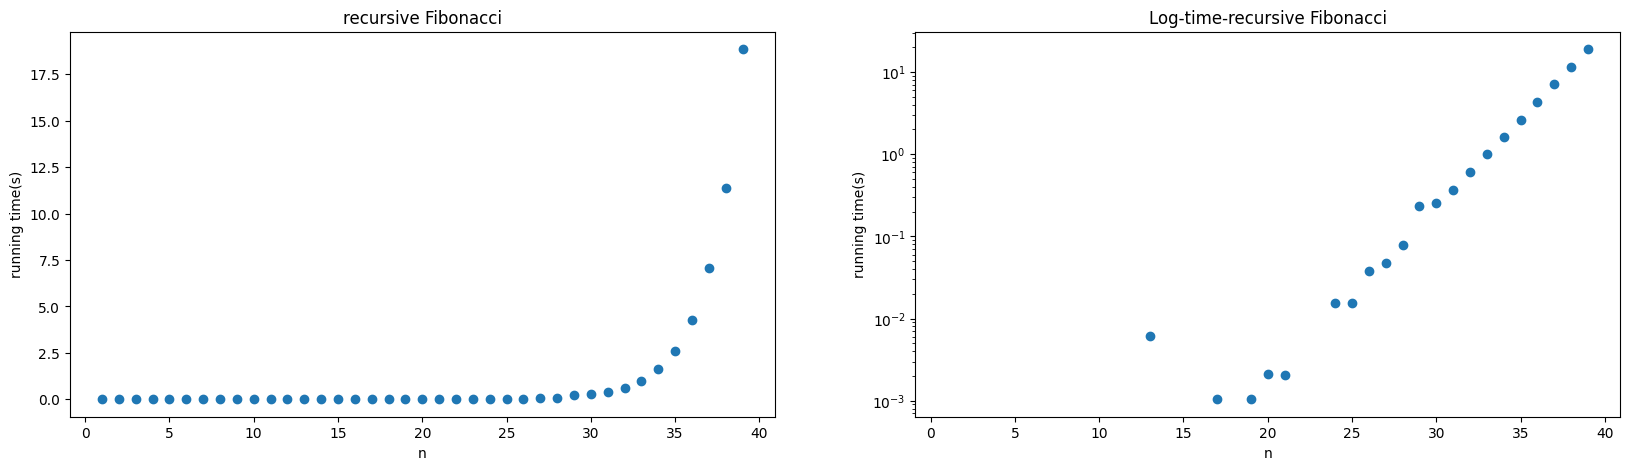

In [37]:
#display time~n plot
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(ns,times)
plt.xlabel('n')
plt.ylabel('running time(s)')
plt.title('recursive Fibonacci')
plt.subplot(1,2,2)
plt.scatter(ns,times)
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('running time(s)')
plt.title('Log-time-recursive Fibonacci')
plt.show()

In [46]:
ns_lru=range(1,100000)
times_lru=[time_func(fibonacci_lru,n) for n in ns_lru]

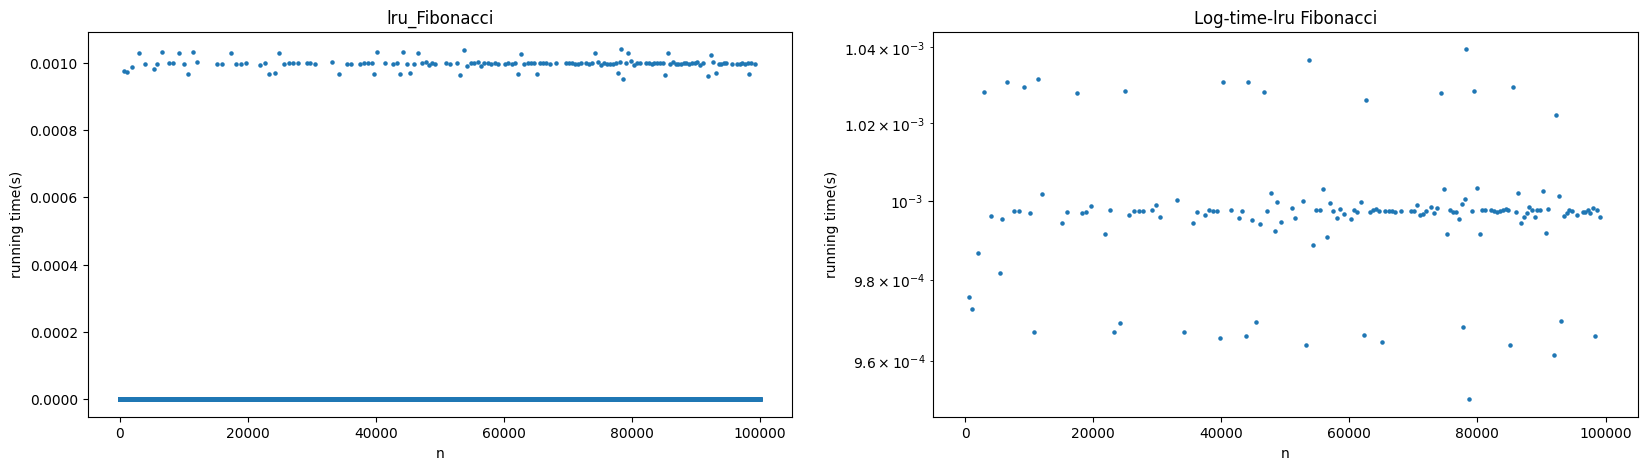

In [66]:
#display time~n plot
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(ns_lru,times_lru,s=5) #s= point size
plt.xlabel('n')
plt.ylabel('running time(s)')
plt.title('lru_Fibonacci')
plt.subplot(1,2,2)
plt.scatter(ns_lru,times_lru,s=5)
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('running time(s)')
plt.title('Log-time-lru Fibonacci')
plt.show()

 Discuss your choices (e.g. why those n and why you're displaying it that way; 5 points) and your results (5 points).

For the first naive Fibonacci function, I set n in range(1,40) because when n is larger than 35, the running time will be quite long. To save my testing time, I set max n to be 39 and min n to be 1. In the right subplot, I set y-scale to log scale and x-scale is the original scale to show the exponential relationship between them.
For the lru_Fibonacci, I set n in range(1,100,000) because if n is small, it runs too quick to capture enough long running time points for visualization. I display them in the same subplot setting with naive Fibonacci to make them look more intuitive.

My results:
For the naive Fibonacci function, the straight line in the right subplot shows that $\log time = \alpha n$. So $time=10^{\alpha n}=(10^\alpha)^n=\varphi^n$
Computational Complexity for recursive Fibonacci is $O(\varphi^n)$, where $\varphi\approx1.618$. It grows exponentially.

For the lru_Fibonacci, most running time points are 0 and some are 0.001s, independent of n. So in the best case, Computational Complexity for lru_Fibonacci is $O(1)$, if I use an ascending list of n for timing it. But if the lru_Fibonacci has no former data records in our cache, in the worst case, its computational complexity is $O(n)$, shown in the below *execution times~n* plot.

In [14]:
count=0 #count is the Algorithm execution times
@lru_cache(maxsize=3)
def fibonacci_lru(n):
    global count
    if n<=0:
        print('BAD INPUT, n must be positive integer')
        return None
    if n<3:
        return 1
    else:
        count+=1
        return fibonacci_lru(n-1)+fibonacci_lru(n-2)
ns_lru=list(range(1,900))

times_lru=[]
counts=[]
for n in ns_lru:
    times_lru.append(time_func(fibonacci_lru,n))
    counts.append(count)
    count=0
    # print(fibonacci_lru.cache_info())
    fibonacci_lru.cache_clear()

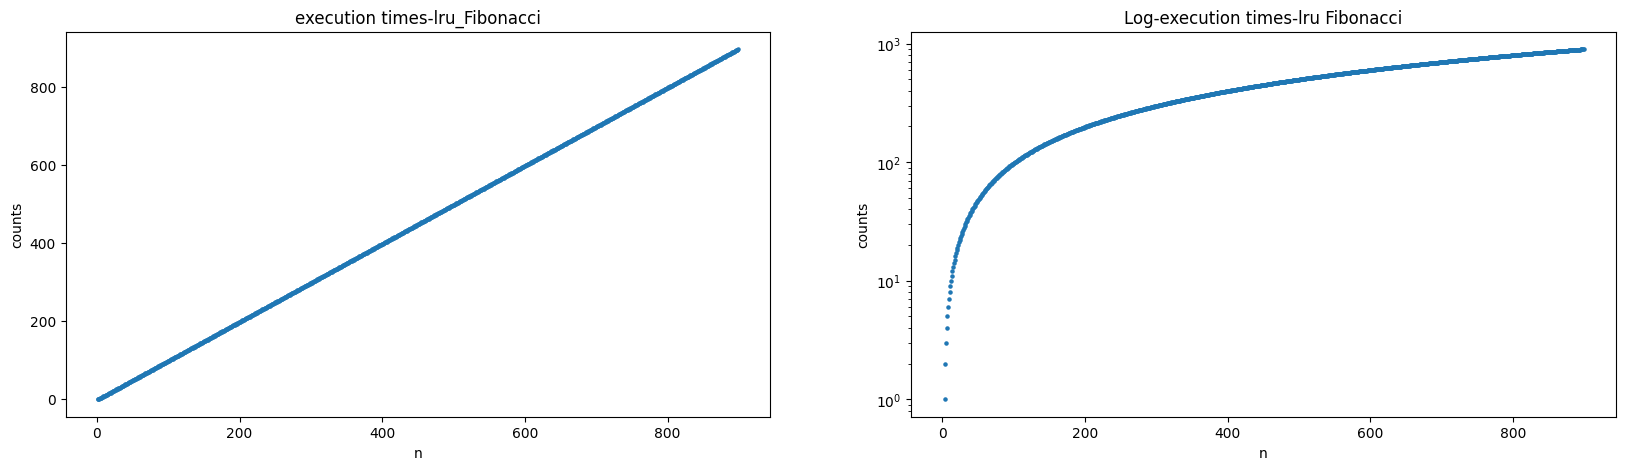

In [25]:
#display count~n plot
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(ns_lru,counts,s=5) #s= point size
plt.xlabel('n')
plt.ylabel('counts')
plt.title('execution times-lru_Fibonacci')
plt.subplot(1,2,2)
plt.scatter(ns_lru,counts,s=5)
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('counts')
plt.title('Log-execution times-lru Fibonacci')
plt.show()

# Exercise 4

1. Implement a function that takes two strings and returns an optimal local alignment (6 points) and score (6 points) using the Smith-Waterman algorithm; insert "-" as needed to indicate a gap (this is part of the alignment points). Your function should also take and correctly use three keyword arguments with defaults as follows: match=1, gap_penalty=1, mismatch_penalty=1 (6 points). Here, that is a penalty of one will be applied to match scores for each missing or changed letter.

In [7]:
import numpy as np

def align(seq1,seq2,match=1,gap_penalty=1,mismatch_penalty=1):
    #Initialize Matrix M with shape(n+1,m+1) to avoid 'out of index' error
    Init_M=np.zeros((len(seq1)+1,len(seq2)+1),dtype=int)

    def s(a,b):  #Define s(ai,bj)
        if a==b:
            return match
        else:
            return -mismatch_penalty
    #Calculate values of Mij from the top left M_11
    for i in range(1,len(seq1)+1):
        for j in range(1,len(seq2)+1):
            Init_M[i,j]=max([Init_M[i-1,j-1]+s(seq1[i-1],seq2[j-1]),Init_M[i-1,j]-gap_penalty,
                             Init_M[i,j-1]-gap_penalty,0])
    #Find the biggest element's index
    max_value=np.max(Init_M)  # The highest score
    Max_index=np.argwhere(Init_M == max_value).tolist() #In case there are several max values
    print('M=',Init_M)

    #Traceback
    best_matches_seq1=[] #In case there are several best alignments
    best_matches_seq2=[]
    for item in Max_index:
        i,j=item[0],item[1]
        match_seq2=''
        match_seq1=''
        while Init_M[i,j]>0:
            if seq1[i-1]==seq2[j-1]: #if ai=bj, go diagonally
                match_seq1=seq1[i-1]+match_seq1
                match_seq2=seq2[j-1]+match_seq2
                i-=1
                j-=1
            else:
                next_index=[(i-1,j-1),(i-1,j),(i,j-1)]
                max_back=np.argmax([Init_M[i-1,j-1],Init_M[i-1,j],Init_M[i,j-1]])
                # print('max back',max_back)
                next_index=next_index[max_back]
                # print('next index',next_index)
                if next_index==(i-1,j-1): #go diagonally
                    match_seq1=seq1[i-1]+match_seq1
                    match_seq2=seq2[j-1]+match_seq2
                    i-=1
                    j-=1
                elif next_index==(i-1,j): #go up
                    match_seq2='_'+match_seq2
                    match_seq1=seq1[i-1]+match_seq1
                    i-=1
                else: # go left
                    match_seq1='_'+match_seq1
                    match_seq2=seq2[j-1]+match_seq2
                    j-=1

        best_matches_seq1.append(match_seq1)
        best_matches_seq2.append(match_seq2)
    return best_matches_seq1,best_matches_seq2,max_value

2. Test it, and explain how your tests show that your function works. Be sure to test other values of match, gap_penalty, and mismatch_penalty (7 points).

In [8]:
# Example test 1
seq1, seq2, score = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac')
print('best alignment seq1:',seq1)
print('best alignment seq2:',seq2)
print('max score is',score)
# Answer on Canvas: there are several possible results, but one is:
# seq1 = agacccta-cgt-gac
# seq2 = aga-cctagcatcgac
# score = 8 (true for all results)

M= [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 1 0 0 0 2 1 0 1 0 0 1]
 [0 1 0 0 1 0 1 0 0 0 1 0 1 3 2 1 0 1 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 2 4 3 2 1 0]
 [0 0 1 0 0 0 0 1 1 0 0 0 1 1 3 5 4 3 2]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 2 4 6 5 4]
 [0 1 0 0 1 0 2 1 0 0 1 0 0 1 1 3 5 7 6]
 [0 0 0 0 0 2 1 1 0 0 0 2 1 0 0 2 4 6 6]
 [0 1 0 0 1 1 3 2 1 0 1 1 1 2 1 1 3 5 5]
 [0 0 2 1 0 0 2 4 3 2 1 0 2 1 1 2 2 4 6]
 [0 0 1 1 0 0 1 3 5 4 3 2 1 1 0 2 1 3 5]
 [0 0 1 0 0 0 0 2 4 4 3 2 3 2 1 1 1 2 4]
 [0 0 0 2 1 0 0 1 3 5 4 3 2 2 3 2 1 1 3]
 [0 1 0 1 3 2 1 0 2 4 6 5 4 3 2 2 1 2 2]
 [0 0 2 1 2 2 1 2 1 3 5 5 6 5 4 3 2 1 3]
 [0 0 1 1 1 3 2 1 1 2 4 6 5 5 4 3 4 3 2]
 [0 0 0 2 1 2 2 1 0 2 3 5 5 4 6 5 4 3 2]
 [0 0 0 1 1 2 1 1 0 1 2 4 4 4 5 5 6 5 4]
 [0 1 0 0 2 1 3 2 1 0 2 3 3 5 4 4 5 7 6]
 [0 0 2 1 1 1 2 4 3 2 1 2 4 4 4 5 4 6 8]]
best alignment seq1: ['agacccta_cgt_gac']
best alignment seq2: ['aga_cctagcatcgac']
max score 

In the example test 1, my function's output is the same with the result on Canvas. There are 12 matches, 1 mismatch and 3 gaps. Score=12\*1-1\*1-1\*3=8. My function works.

In [11]:
# Example test 2
seq1, seq2, score = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', gap_penalty=2)
# Answer on Canvas: there is only one possibility: seq1 = seq2 = gcatcga, score=7
print('best alignment seq1:',seq1)
print('best alignment seq2:',seq2)
print('max score is',score)

M= [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 1 0 0 0 2 0 0 1 0 0 1]
 [0 1 0 0 1 0 1 0 0 0 1 0 0 3 1 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 1 4 2 0 0 0]
 [0 0 1 0 0 0 0 1 1 0 0 0 1 0 2 5 3 1 1]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 3 6 4 2]
 [0 1 0 0 1 0 2 0 0 0 1 0 0 1 0 1 4 7 5]
 [0 0 0 0 0 2 0 1 0 0 0 2 0 0 0 0 2 5 6]
 [0 1 0 0 1 0 3 1 0 0 1 0 1 1 0 0 0 3 4]
 [0 0 2 0 0 0 1 4 2 0 0 0 1 0 0 1 0 1 4]
 [0 0 1 1 0 0 0 2 5 3 1 0 1 0 0 1 0 0 2]
 [0 0 1 0 0 0 0 1 3 4 2 0 1 0 0 1 0 0 1]
 [0 0 0 2 0 0 0 0 1 4 3 1 0 0 1 0 0 0 0]
 [0 1 0 0 3 1 1 0 0 2 5 3 1 1 0 0 0 1 0]
 [0 0 2 0 1 2 0 2 1 0 3 4 4 2 0 1 0 0 2]
 [0 0 0 1 0 2 1 0 1 0 1 4 3 3 1 0 2 0 0]
 [0 0 0 1 0 0 1 0 0 2 0 2 3 2 4 2 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 1 1 1 2 2 3 3 1 0]
 [0 1 0 0 1 0 2 0 0 0 1 0 0 2 1 1 2 4 2]
 [0 0 2 0 0 0 0 3 1 0 0 0 1 0 1 2 0 2 5]]
best alignment seq1: ['gcatcga']
best alignment seq2: ['gcatcga']
max score is 7


In the example test 2, my function's output is the same with the answer on Canvas. There are 7 matches. Score=7\*1=7. My function works.

Below I tested other values of match, gap_penalty and mismatch_penalty. I used a python package named *swalign* to generate true answers and compared my function's output with the package's output. They are the same. Therefore, my function can give all the correct best alignment sequence pairs.

In [14]:
# Test other values of match, gap_penalty and mismatch
seq1, seq2, score = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac',match=3,gap_penalty=3,mismatch_penalty=1)
print('best alignment seq1:',seq1)
print('best alignment seq2:',seq2)
print('max score is',score)

M= [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  3  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  2  3  0  0  0  0  2  3  0  0  0  2  3  0  0]
 [ 0  0  3  0  0  1  2  3  3  0  0  1  6  3  0  3  1  2  3]
 [ 0  3  0  2  3  0  4  1  2  2  3  0  3  9  6  3  2  4  1]
 [ 0  0  2  3  1  2  1  3  0  5  2  2  0  6 12  9  6  3  3]
 [ 0  0  3  1  2  0  1  4  6  3  4  1  5  3  9 15 12  9  6]
 [ 0  0  0  2  0  5  2  1  3  5  2  7  4  4  6 12 18 15 12]
 [ 0  3  0  0  5  2  8  5  2  2  8  5  6  7  4  9 15 21 18]
 [ 0  0  2  0  2  8  5  7  4  1  5 11  8  5  6  6 12 18 20]
 [ 0  3  0  1  3  5 11  8  6  3  4  8 10 11  8  5  9 15 17]
 [ 0  0  6  3  0  2  8 14 11  8  5  5 11  9 10 11  8 12 18]
 [ 0  0  3  5  2  0  5 11 17 14 11  8  8 10  8 13 10  9 15]
 [ 0  0  3  2  4  1  2  8 14 16 13 10 11  8  9 11 12  9 12]
 [ 0  0  0  6  3  3  0  5 11 17 15 12  9 10 11  8 10 11  9]
 [ 0  3  0  3  9  6  6  3  8 14 20 17 14 12  9 10  7 13 10]
 [ 0  0  6  3  6  8  5  9  6 11 17 19

There are 13 matches, 3 gaps, 2 mismatches. Score=13\*3-3\*3-2\*1=28.

In [32]:
'''Print answers using swalign package'''
import swalign
match = 3
mismatch = -1
scoring = swalign.NucleotideScoringMatrix(match, mismatch)

sw = swalign.LocalAlignment(scoring,gap_penalty=-3)
alignment = sw.align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac')
alignment.dump()
print(alignment)

Query:  2 ctaga-cctagcatcgac 18
          |.||| |||| |.| |||
Ref  :  6 cgagacccta-cgt-gac 21

Score: 28
Matches: 13 (72.2%)
Mismatches: 5
CIGAR: 5M1D4M1I3M1I3M


In [35]:
# Test other values of match, gap_penalty and mismatch
seq1, seq2, score = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac',match=3,gap_penalty=5,mismatch_penalty=3)
print('best alignment seq1:',seq1)
print('best alignment seq2:',seq2)
print('max score is',score)

M= [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  3  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  3  0  0  0  0  3  0  0]
 [ 0  0  3  0  0  0  0  3  3  0  0  0  6  1  0  3  0  0  3]
 [ 0  3  0  0  3  0  3  0  0  0  3  0  1  9  4  0  0  3  0]
 [ 0  0  0  3  0  0  0  0  0  3  0  0  0  4 12  7  2  0  0]
 [ 0  0  3  0  0  0  0  3  3  0  0  0  3  0  7 15 10  5  3]
 [ 0  0  0  0  0  3  0  0  0  0  0  3  0  0  2 10 18 13  8]
 [ 0  3  0  0  3  0  6  1  0  0  3  0  0  3  0  5 13 21 16]
 [ 0  0  0  0  0  6  1  3  0  0  0  6  1  0  0  0  8 16 18]
 [ 0  3  0  0  3  1  9  4  0  0  3  1  3  4  0  0  3 11 13]
 [ 0  0  6  1  0  0  4 12  7  2  0  0  4  0  1  3  0  6 14]
 [ 0  0  3  3  0  0  0  7 15 10  5  0  3  1  0  4  0  1  9]
 [ 0  0  3  0  0  0  0  3 10 12  7  2  3  0  0  3  1  0  4]
 [ 0  0  0  6  1  0  0  0  5 13  9  4  0  0  3  0  0  0  0]
 [ 0  3  0  1  9  4  3  0  0  8 16 11  6  3  0  0  0  3  0]
 [ 0  0  6  1  4  6  1  6  3  3 11 13

There are 7 matches. Score=7*3=21.

In [36]:
'''Print answers using swalign package'''
match = 3
mismatch = -3
scoring = swalign.NucleotideScoringMatrix(match, mismatch)

sw = swalign.LocalAlignment(scoring,gap_penalty=-5)
alignment = sw.align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac')
alignment.dump()
print(alignment)

Query: 11 gcatcga 17
          |||||||
Ref  :  2 gcatcga 8

Score: 21
Matches: 7 (100.0%)
Mismatches: 0
CIGAR: 7M


In [41]:
# Test other values of match, gap_penalty and mismatch
seq1, seq2, score = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac',match=5,gap_penalty=2,mismatch_penalty=1)
print('best alignment seq1:',seq1)
print('best alignment seq2:',seq2)
print('max score is',score)

M= [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  3  1  0  0  0  5  3  1  0  0  5  3  1  0  0]
 [ 0  0  0  3  4  8  6  4  2  3  4  8  6  4  3  4  8  6  4]
 [ 0  0  5  3  2  6  7 11  9  7  5  6 13 11  9  8  6  7 11]
 [ 0  5  3  4  8  6 11  9 10  8 12 10 11 18 16 14 12 11  9]
 [ 0  3  4  8  6  7  9 10  8 15 13 11  9 16 23 21 19 17 15]
 [ 0  1  8  6  7  5  7 14 15 13 14 12 16 14 21 28 26 24 22]
 [ 0  0  6  7  5 12 10 12 13 14 12 19 17 15 19 26 33 31 29]
 [ 0  5  4  5 12 10 17 15 13 12 19 17 18 22 20 24 31 38 36]
 [ 0  3  4  3 10 17 15 16 14 12 17 24 22 20 21 22 29 36 37]
 [ 0  5  3  3  8 15 22 20 18 16 17 22 23 27 25 23 27 34 35]
 [ 0  3 10  8  6 13 20 27 25 23 21 20 27 25 26 30 28 32 39]
 [ 0  1  8  9  7 11 18 25 32 30 28 26 25 26 24 31 29 30 37]
 [ 0  0  6  7  8  9 16 23 30 31 29 27 31 29 27 29 30 28 35]
 [ 0  0  4 11  9  7 14 21 28 35 33 31 29 30 34 32 30 29 33]
 [ 0  5  3  9 16 14 12 19 26 33 40 38 36 34 32 33 31 35 33]
 [ 0  3 10  8 14 15 13 17 24 31 38 39

There are 14 matches, 4 gaps, 2 mismatches. Score=14\*5-4\*2-2\*1=60

In [42]:
'''Print answers using swalign package'''
match = 5
mismatch = -1
scoring = swalign.NucleotideScoringMatrix(match, mismatch)

sw = swalign.LocalAlignment(scoring,gap_penalty=-2)
alignment = sw.align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac')
alignment.dump()
print(alignment)

Query:  1 a-ctaga-cctagcatcgac 18
          | |.||| |||| |.| |||
Ref  :  4 atcgagacccta-cgt-gac 21

Score: 60
Matches: 14 (70.0%)
Mismatches: 6
CIGAR: 1M1D5M1D4M1I3M1I3M
